Please copy the notebook to your drive and write your code in it.

# New section

Import necessary libraries

In [53]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

Read Dataset from csv file

In [54]:
 filename='/content/Iris.csv'
 iris= pd.read_csv(filename)

Preview dataset

In [55]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


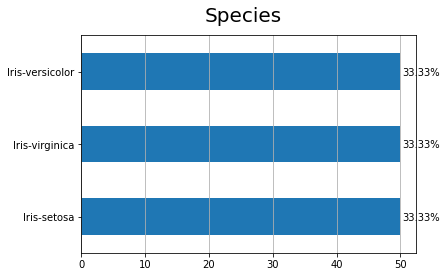

In [56]:
#distribution of each class of target variable
axis = iris[ 'Species'].value_counts().sort_values().plot(kind="barh")
totals= []
for i in axis.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in axis.patches:
     axis.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
axis.grid(axis="x")
plt.suptitle('Species', fontsize=20)
plt.show()

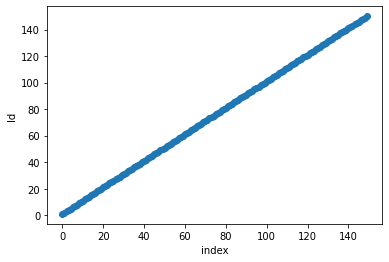

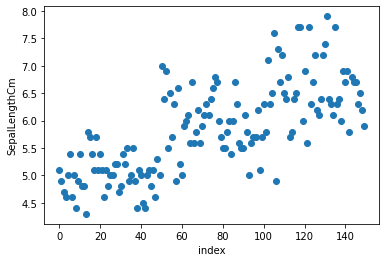

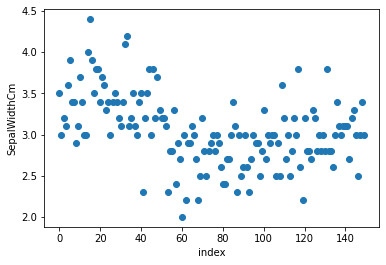

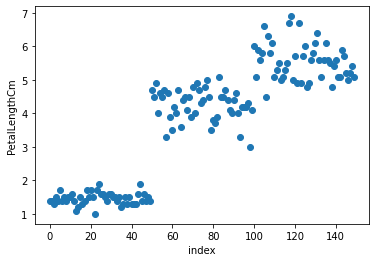

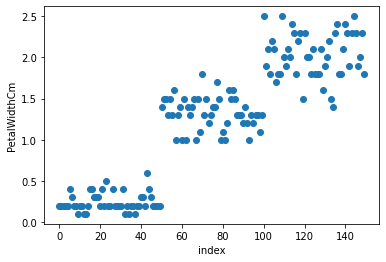

In [57]:
# Visualize the distribution of data for every feature
for x in iris.columns:
  if x != "Species":
    plt.xlabel("index")
    plt.ylabel(x)
    plt.scatter(iris.index,iris[x])
    plt.show()
    print('\n')

Declare feature vector and target variable

In [58]:
y = iris[["Species"]]
X = iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

Replace categorical data with numbers

In [59]:
oe = OrdinalEncoder()
iris["Species"] = oe.fit_transform(iris[["Species"]])
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0.0
1,2,4.9,3.0,1.4,0.2,0.0
2,3,4.7,3.2,1.3,0.2,0.0
3,4,4.6,3.1,1.5,0.2,0.0
4,5,5.0,3.6,1.4,0.2,0.0


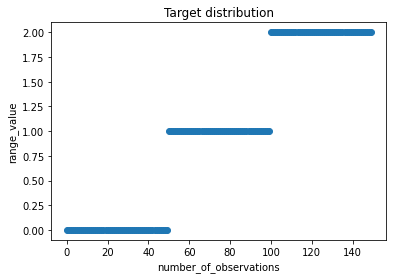

In [60]:
#distribution of target variables
plt.scatter(iris.index , iris['Species'])
plt.xlabel("number_of_observations")
plt.ylabel("range_value")
plt.title("Target distribution")


plt.show()

Split data into train and test sets

In [61]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 24)

Base estimator(Decision Tree classifier) : a weak learner with max_depth=2

In [62]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=2)


Fit weak classifier

In [63]:
model.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Calculate the accuracy by the weak learner

In [64]:
score = cross_val_score(model, X, y, cv=5)
print(score.mean())

0.9333333333333332


Build the AdaBoost model with the the above decision tree and by increasing the number of trees from 1 to 5 with a step of 1 in the lines:

Hint:   
estimators = list(range(1, 5, 1))
for n_est in estimators:



In [65]:
models_adaB = dict()
estimators = list(range(1,6,1))
for n_est in estimators:
  models_adaB[str(n_est)] = AdaBoostClassifier(base_estimator = model,n_estimators=n_est)
models_adaB

{'1': AdaBoostClassifier(algorithm='SAMME.R',
                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                          class_weight=None,
                                                          criterion='entropy',
                                                          max_depth=2,
                                                          max_features=None,
                                                          max_leaf_nodes=None,
                                                          min_impurity_decrease=0.0,
                                                          min_impurity_split=None,
                                                          min_samples_leaf=1,
                                                          min_samples_split=2,
                                                          min_weight_fraction_leaf=0.0,
                                                          presort='deprecated',
     

define function to evaluate models


In [66]:

def evaluate_models(model,X,y):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

Plot the model performance

>1 0.938 (0.038)
>2 0.956 (0.040)
>3 0.949 (0.036)
>4 0.940 (0.033)
>5 0.953 (0.034)


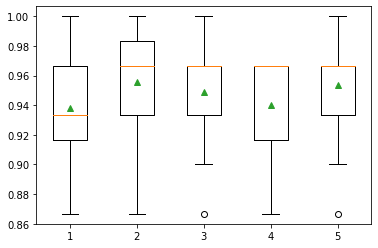

In [67]:
results, names = list(), list()
for name, model in models_adaB.items():
	scores = evaluate_models(model, X, y.values.ravel())
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

#Bayes Classfication

# New Section

Import modules

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold

Naive Bayes algorithm using 5-fold cross validation 

In [69]:
gnb=GaussianNB()
mnb=MultinomialNB()
cnb=ComplementNB()
bnb=BernoulliNB()
value_ = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
gnb=gnb.fit(X_train,y_train)
Ypredg=gnb.predict(X_test)
cvsg=cross_val_score(gnb,X_train,y_train,cv=value_)
print("Gaussian Naive Bayes accuracy = %.5f , standard deviation = %.5f , Variance = %.5f" %(cvsg.mean(),cvsg.std(),cvsg.var()))
mnb=mnb.fit(X_train,y_train)
Ypredm=mnb.predict(X_test)
cvsm=cross_val_score(mnb,X_train,y_train,cv=value_)
print("Multinomial Naive Bayes accuracy = %.5f with standard deviation = %.5f, Variance = %.5f" %(cvsm.mean(),cvsm.std(),cvsm.var()))
cnb=cnb.fit(X_train,y_train)
Ypredc=cnb.predict(X_test)
cvsc=cross_val_score(cnb,X_train,y_train,cv=value_)
print("Complement Naive Bayes accuracy = %.5f with standard deviation = %.5f , Variance = %.5f" %(cvsc.mean(),cvsc.std(),cvsc.var()))
bnb=bnb.fit(X_train,y_train)
Ypredb=bnb.predict(X_test)
cvsb=cross_val_score(bnb,X_train,y_train,cv=value_)
print("Bernoulli Naive Bayes accuracy = %.5f with standard deviation = %.5f , Variance = %.5f" %(cvsb.mean(),cvsb.std(),cvsb.var()))




Gaussian Naive Bayes accuracy = 0.92381 , standard deviation = 0.03810 , Variance = 0.00145
Multinomial Naive Bayes accuracy = 0.73333 with standard deviation = 0.03810, Variance = 0.00145
Complement Naive Bayes accuracy = 0.63810 with standard deviation = 0.02333 , Variance = 0.00054
Bernoulli Naive Bayes accuracy = 0.36190 with standard deviation = 0.02333 , Variance = 0.00054


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Plot the ROC AUC curve

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


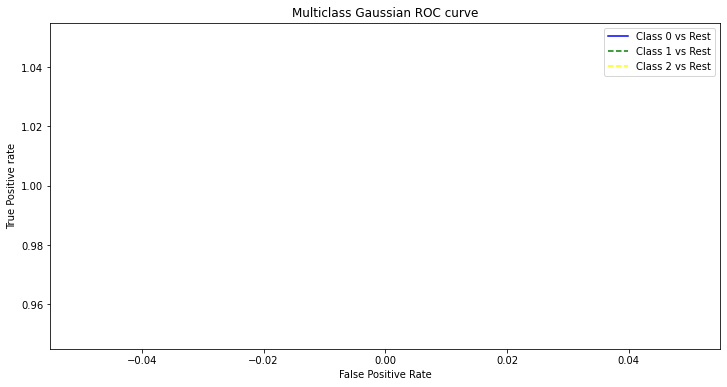

In [70]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
clf_roc = OneVsRestClassifier(gnb)
clf_roc.fit(X_train, y_train)
pred = clf_roc.predict(X_test)
pred_y= clf_roc.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}

for i in range(3):    
    fpr[i], tpr[i], _ = roc_curve(y_test, pred_y[:,i], pos_label=i)
    
# plot the curve    
plt.figure(figsize=(12,6))
plt.plot(fpr[0], tpr[0], linestyle='-',color='blue', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='yellow', label='Class 2 vs Rest')
plt.plot((0,0),(1,1), color='red')
plt.title('Multiclass Gaussian ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

Use logarithmic discriminant function to compute accuracy

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X_tr,X_te,Y_tr,Y_te = train_test_split(X,y,test_size = 0.2)
model = LDA()
model.fit(X_tr,Y_tr.values.ravel())
pd.DataFrame()['LDA'] = pd.Series(list(model.predict(X_te)).count(iii) for iii in set(y))
print(model.score(X_te,Y_te))

1.0


Bayes risk

In [72]:
predg = gnb.predict_proba(X_test)
predm = mnb.predict_proba(X_test)
predc= cnb.predict_proba(X_test)
predb = bnb.predict_proba(X_test)
model_pred = model.predict_proba(X_test) 
lst_1 =[]
lst_2 = np.array([[1,2,3],[4,5,6],[7,8,9]])
model_lst=[predg,predm,predc,predb,model_pred]
for i in model_lst:
  lst_1.append(np.sum(np.dot(i,lst_2.T),axis=0))
print("Bayes risk for Gaussian = :",lst_1[0])
print("Bayes risk for Multinomial = :",lst_1[1])
print("Bayes risk for Categorical = :",lst_1[2])
print("Bayes risk for Bernoulli = :",lst_1[3])
print("Bayes risk for Linear Discriminant = :",lst_1[4])

Bayes risk for Gaussian = : [ 93.3902827 228.3902827 363.3902827]
Bayes risk for Multinomial = : [ 93.49073385 228.49073385 363.49073385]
Bayes risk for Categorical = : [ 90.27496081 225.27496081 360.27496081]
Bayes risk for Bernoulli = : [ 88.58039417 223.58039417 358.58039417]
Bayes risk for Linear Discriminant = : [ 92.99622855 227.99622855 362.99622855]


[Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Ensemble methods](https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205)

[Adaboost Explaination](https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe)

[Adaboost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

[Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)


[Bayes Risk](https://drive.google.com/file/d/14oDBVaOWt6y5kSceIPLK59v3iNu9PjWb/view)

[Discriminant function](https://drive.google.com/file/d/1ggLEGpgcwEen1lec5VW1Gqjp9nQI0-rM/view)

[Discriminant function analysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)




